 **ТМО, лабораторная работа №1**

**Исследование и визуализация данных**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *

In [2]:
iris = load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
# Датасет возвращается в виде словаря со следующими ключами
for x in iris:
    print(x)

data
target
target_names
DESCR
feature_names
filename


In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# Размерность данных
iris['data'].shape

(150, 4)

In [8]:
data_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [9]:
data_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Визуальное исследование датасета

### Диаграмма рассеяния

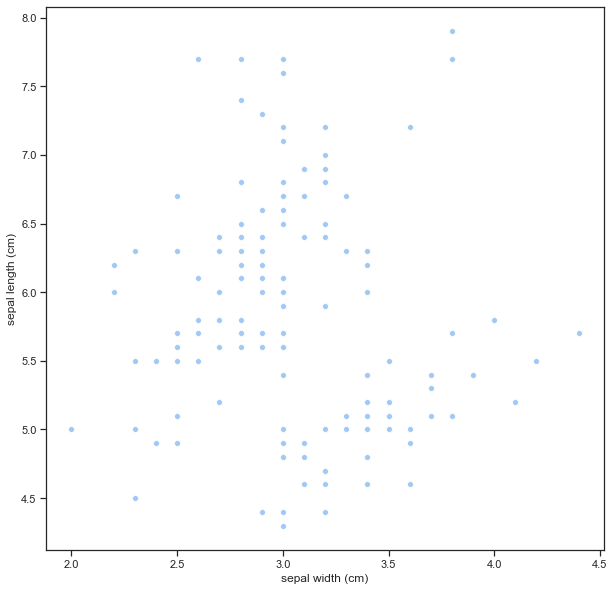

In [23]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal width (cm)', y='sepal length (cm)', data=data_iris)

### Гистограмма

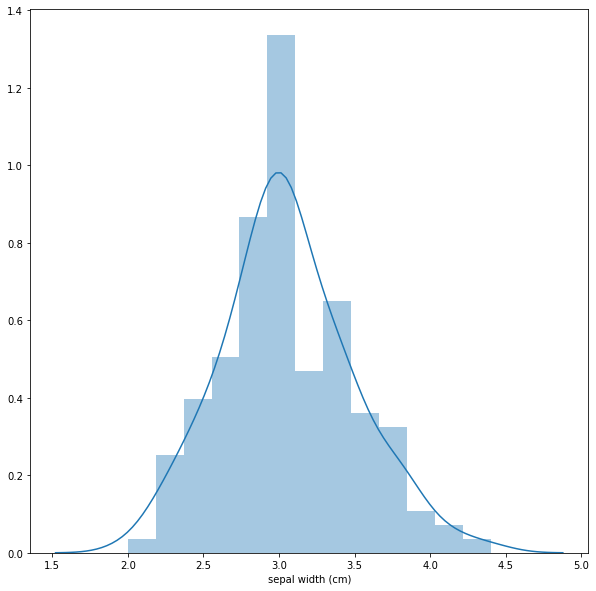

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data_iris['sepal width (cm)'])

### Jointplot

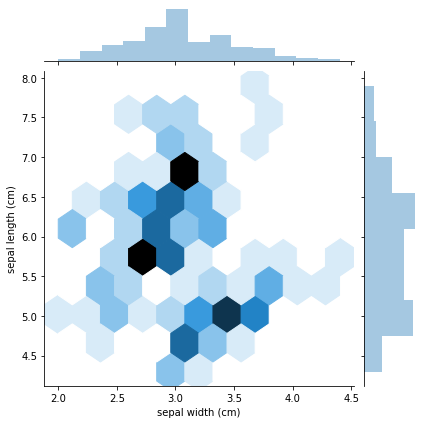

In [12]:
sns.jointplot(x='sepal width (cm)', y='sepal length (cm)', data=data_iris, kind="hex")

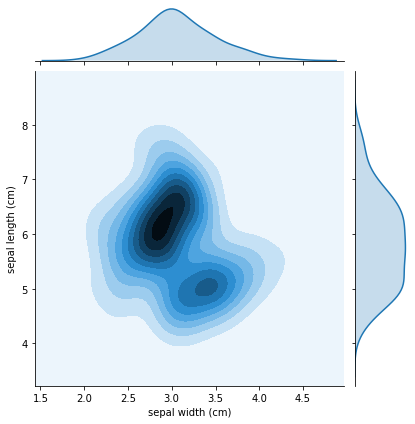

In [13]:
sns.jointplot(x='sepal width (cm)', y='sepal length (cm)', data=data_iris, kind="kde")

### "Парные диаграммы"

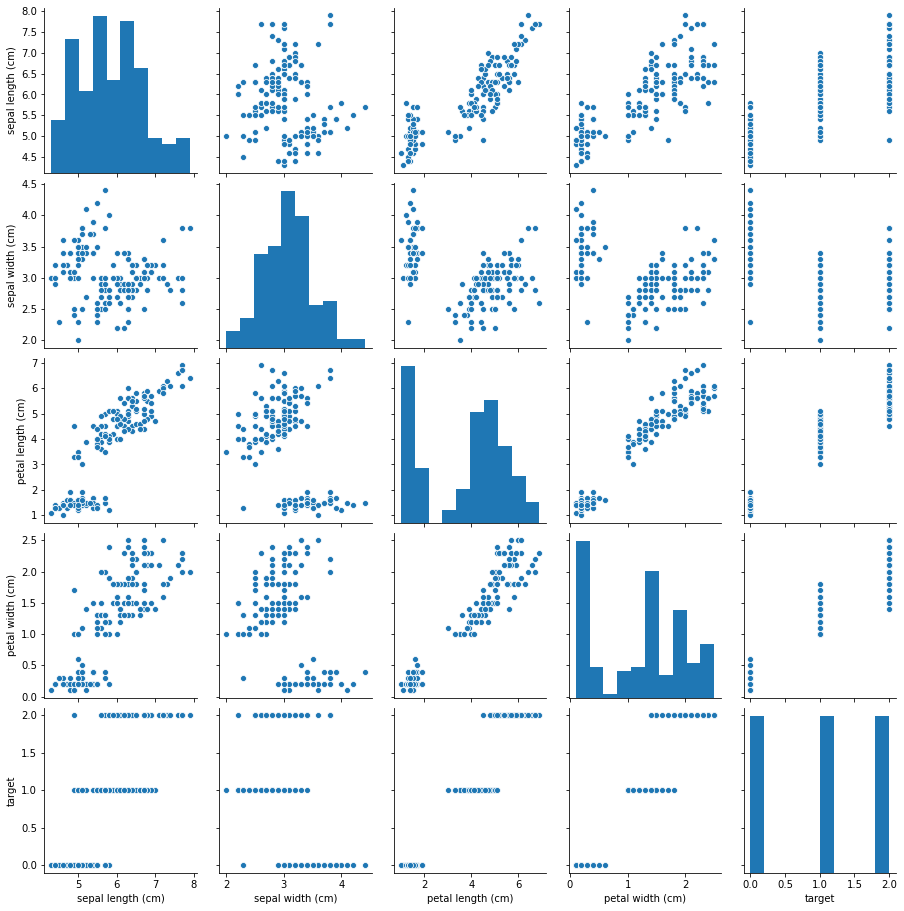

In [14]:
sns.pairplot(data_iris)

"Парные диаграммы" ирисов Фишера, взятые из Википедии (для сравнения)

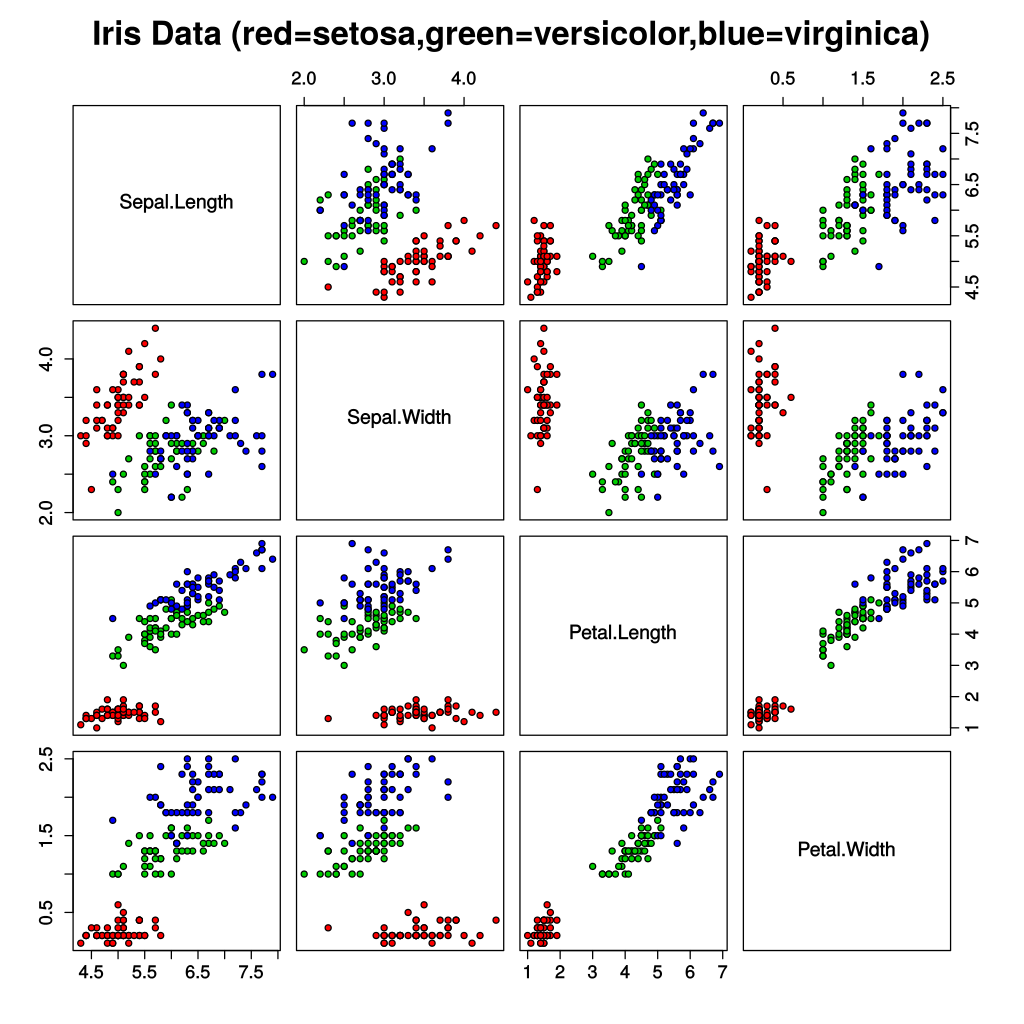

С помощью параметра "hue" сгруппируем значения диаграммы по видам ирисов.

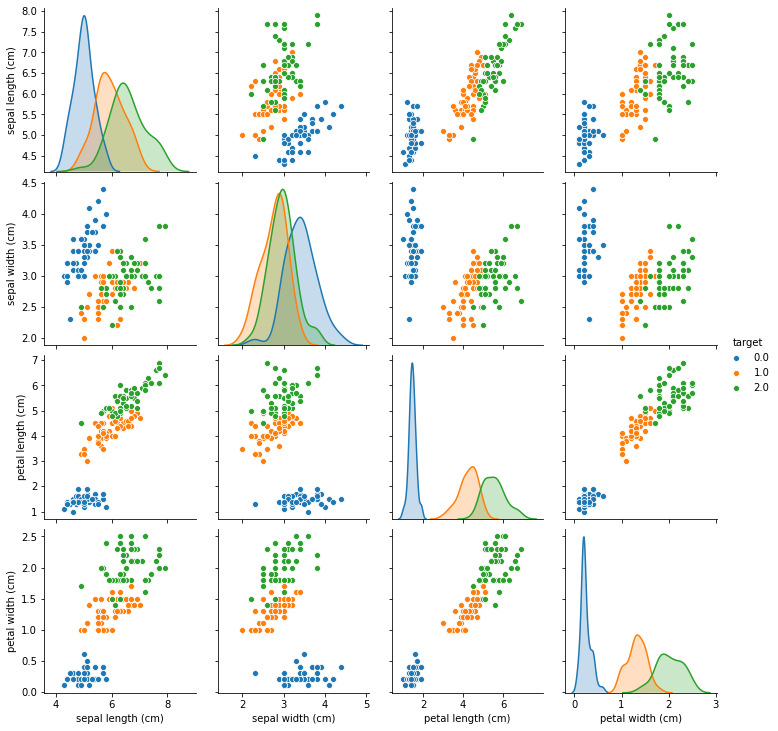

In [15]:
sns.pairplot(data_iris, hue="target")

### Ящик с усами

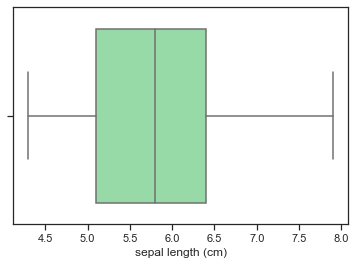

In [16]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x=data_iris["sepal length (cm)"], palette=["g"])

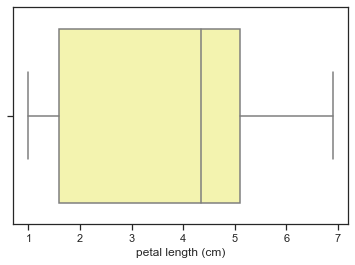

In [17]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x=data_iris["petal length (cm)"], palette=["y"])

### Violin plot

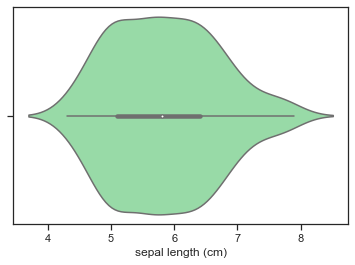

In [18]:
sns.set(style="ticks", palette="pastel")
sns.violinplot(x=data_iris['sepal length (cm)'], palette=["g"])

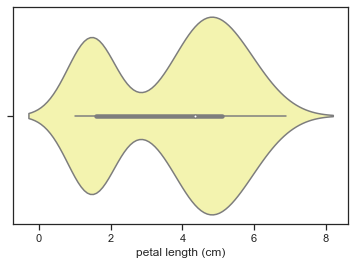

In [34]:
sns.set(style="ticks", palette="pastel")
sns.violinplot(x=data_iris['petal length (cm)'], palette=["y"])

Показательное сравнение графиков violinplot и гистограммы, оба отображают распределение плотности:

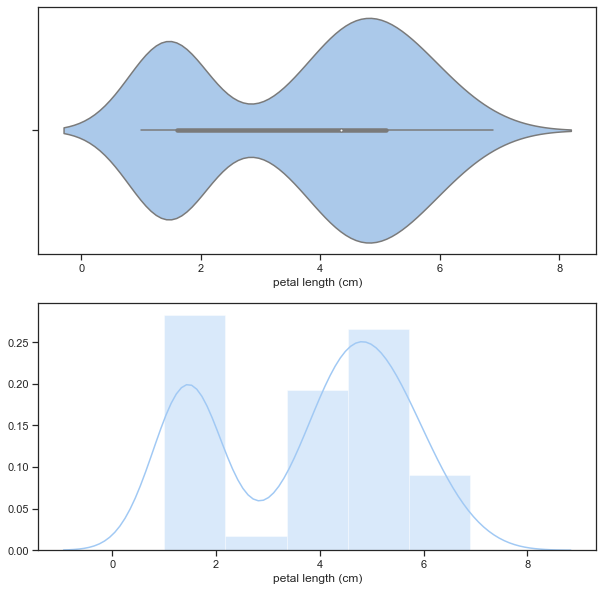

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data_iris['petal length (cm)'])
sns.distplot(data_iris['petal length (cm)'], ax=ax[1])

## Информация о корреляции признаков

In [35]:
data_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Признак sepal width (cm) наименее сильно коррелирует с любым из признаков в модели, поэтому его можно исключить.

**Метод Heatmap для визуализации корреляционной матрицы**

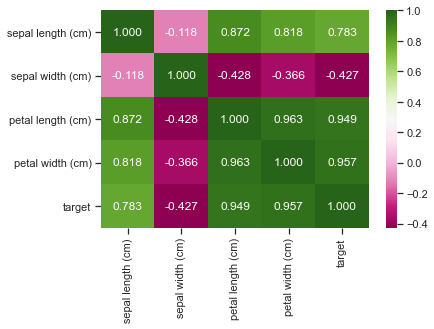

In [47]:
sns.heatmap(data_iris.corr(), cmap='PiYG', annot=True, fmt='.3f')